## 분류(classification) : 
정해진 몇개의 부류로 대응시키는 문제


### Classification
Logistic Regression  
SVM  
Decision Tree  
Random Forest  

데이터는   
학습데이터(training data)  
테스트 데이터(test data)  
검증 데이터(validation data)  


#### Evaluation
+ Accuracy
+ Confution Matrix
+ ROC-AUC




## Decision Tree : 의사 결정 트리
트래형태로 의사결정 지식을 표현한것  
<img src="./img/decision_tree1.png" width="400px" height="400px" align="left">  
<div style="clear:both;">
    
    
    
출처 :  위키피디아, 결정 트리  

Root node(뿌리)  : 초기지점  
Intermediate node : 중간마디 -비교속성     
Terminal node :끝마디 - 부류(class)      

    
데이터 2개 혹 이상의 부분집합으로 분할 
=> 데이터가 균일해 지도록

classification :  비슷한 범주를 갖고 있는 관측치끼리 모음   
regression : 비슷한 수치를 갖고 있는 관측치끼리 모음

정보이론관점   
 => 송신자, 채널, 수신자를 이용하여 모형화  
 => 송신자는 채널을 통해 전달되는 메시지를 만들어 낸다.   
 => 채널은 특정한 방식을 통해 메세지를 변경한다.    
 => 수신자는 어떤 메세지가 보내진 것인지 추론한다.   
 #### => 정보 엔트로피 (Information Entropy)   
     : 각 메세지에 포함된 정보의 기댓값  
       정보를 얻을 수 있는 가능성을 표현  
       불확실성을 의미   
   
#### 불확실성이 최대한 감소하도록 하는 방향으로 학습진행  
#### 순도가 증가/불확실성이 감소하는 것
    => 정보획득(information gain) :  1- entropy지수  
    


#### information content : 
  *I(p) =  - $ log_2 p$  , I(0)=0*   
#### information entropy  
   *H(X) = $\sum_{i=1}^{m} p_i I(p_i) $*
   
   
https://en.wikipedia.org/wiki/Information_content  
https://en.wikipedia.org/wiki/Entropy_(information_theory)  

Height(tall, short)
Hair(dark, blonde, red)
Eye(blue, brown)
 
<img src="./img/decision_data.png" width="200px" height="200px" align="left">
<div style="clear:both; padding-top:10px">
Height   
    
$\hat H(X) $  =  $ - \frac{3}{8}log_2 \frac{3}{8} - \frac{5}{8} log_2 \frac{5}{8}$  = 0.95    

$\hat H(X| Height=t)$ = $ - \frac{3}{5}log_2 \frac{3}{5} -\frac{2}{5} log_2 \frac{2}{5} $  =0.97  

$\hat H(X|Height=x)$ =$-\frac{2}{3}log_2 \frac{2}{3} -\frac{1}{3}log_2 \frac{1}{3}$ =0.91  

$\hat H(X|Height)= \frac{5}{8} \hat H(X|Height=t)$ + $ \frac{3}{8} \hat H(X|Height=s)$    

$\frac{5}{8} (0.971) +\frac{3}{8} (0.918) $= 0.95
    
Hair  
$\hat H(X|Hair)= \frac{3}{8} \hat H(X|hair=d)+ \frac{4}{8} \hat H(X|hair=b)+ \frac {1}{8} \hat H(X|hair=r)$= 0.5  
    
$ \hat H(X|hair=d)$ = 0
    
$ \hat H(X|hair=r)$ =0

Eye   
$ \hat H(X|Eye) $= 0.607  

<img src="./img/decision_data2.png" width="250px" hegith="250px" align="left">
<div style="clear:both; padding-top:10px">
=>traing data의 overfitting 위험 가지치기(pruning)가 필요   

=> 해결책 Random forest  
    

$ p_{j}, j \in \{1,2,…J\}$ : 집합  
클래스 $j$ 를 지닌 요소를 선택할 확률  

Gini Impurity

$\sum_{j=1}^{J} p_j(1-p_j)$


 $𝑗 \in {R,B}$ 일때  $J=2$ 

전체갯수 : 120,  R갯수: 37,    B갯수: 73   


$\big( \frac{37}{120} \big) \big( 1 – \frac{37}{120} \big) + \big( \frac{73}{120} \big) \big( 1 – \frac{73}{120} \big) = 0.427$

### 1. Regression Tree

In [1]:
import seaborn as sns
import pandas as pd


advertising = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
type(advertising)

pandas.core.frame.DataFrame

In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


target=advertising['sales'].copy()
del advertising['sales']
print(advertising)


        TV  radio  newspaper
1    230.1   37.8       69.2
2     44.5   39.3       45.1
3     17.2   45.9       69.3
4    151.5   41.3       58.5
5    180.8   10.8       58.4
..     ...    ...        ...
196   38.2    3.7       13.8
197   94.2    4.9        8.1
198  177.0    9.3        6.4
199  283.6   42.0       66.2
200  232.1    8.6        8.7

[200 rows x 3 columns]


In [8]:
x_train, x_test, y_train, y_test = train_test_split(advertising, target,test_size=0.3, random_state=1000)

In [9]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred=dtr.predict(x_test)


In [10]:
score = dtr.score(x_train, y_train)
score2=dtr.score(x_test, y_test)
print("train R-squared:", score) 
print('test R-squared ',score2)

train R-squared: 1.0
test R-squared  0.9511069908795583


In [11]:
from sklearn.tree import export_graphviz
dot_data=export_graphviz(dtr, out_file='tree.dot', feature_names=advertising.columns
                , special_characters=True, impurity=True, filled=True,rounded=True)
# graph = graphviz.Source(dot_data)  

# graph


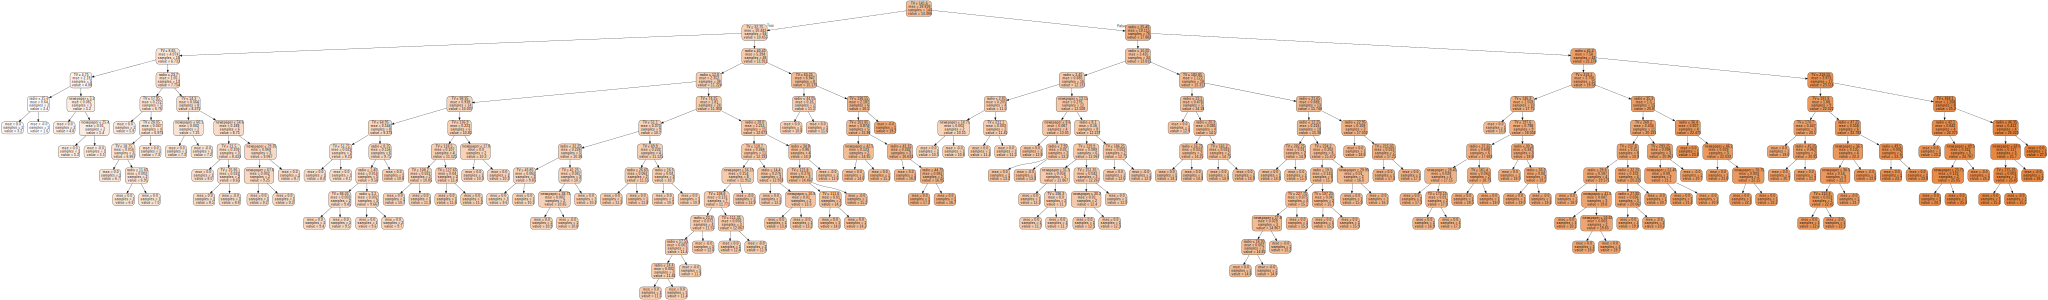

In [12]:
import graphviz

with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [13]:
from sklearn.metrics import mean_squared_error
tree_sizes = range(2, 31)

MSE_scores = []

# 7-Fold CV for each tree size 
for size in tree_sizes:
    reg_tree = DecisionTreeRegressor(max_leaf_nodes=size, random_state=123)
    MSE_s = -cross_val_score(reg_tree, x, y, cv=7)
    MSE_scores.append(np.mean(MSE_s))
    
# plot CV-MSE as tree size gets bigger 
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

NameError: name 'cross_val_score' is not defined

In [ ]:
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale

boston = load_boston()

x, y = boston.data, boston.target

x = scale(x)
y=scale(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True)

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

score = dtr.score(x_train, y_train)
print("R-squared:", score)

pred = dtr.predict(x_test)

mse = mean_squared_error(y_test, pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

x_ax = range(len(y_test))

fig = plt.figure(figsize=(10,5))

plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, pred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   
 


### 2. classification Tree

### 당뇨병 예측

In [14]:
import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'outcome']
# load dataset
pima = pd.read_csv("./data/diabetes.csv",header=0)
pima.rename({j: i for i, j in zip(col_names, pima.columns)}, axis=1, inplace=True)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
for index in pima.columns:
    data=pima[pima[index]==0][index].count()
    print(index, data)

pregnant 111
glucose 5
bp 35
skin 227
insulin 374
bmi 11
pedigree 0
age 0
outcome 500


In [16]:
import numpy as np
pima.iloc[:,:-1]=pima.replace(0,np.nan )

In [17]:
positive=pima[pima['outcome']==1].copy()
negative=pima[pima['outcome']==0].copy()

In [18]:
print(positive.head())
print(negative.head())

   pregnant  glucose    bp  skin  insulin   bmi  pedigree  age  outcome
0       6.0    148.0  72.0  35.0      NaN  33.6     0.627   50        1
2       8.0    183.0  64.0   NaN      NaN  23.3     0.672   32        1
4       NaN    137.0  40.0  35.0    168.0  43.1     2.288   33        1
6       3.0     78.0  50.0  32.0     88.0  31.0     0.248   26        1
8       2.0    197.0  70.0  45.0    543.0  30.5     0.158   53        1
    pregnant  glucose    bp  skin  insulin   bmi  pedigree  age  outcome
1        1.0     85.0  66.0  29.0      NaN  26.6     0.351   31        0
3        1.0     89.0  66.0  23.0     94.0  28.1     0.167   21        0
5        5.0    116.0  74.0   NaN      NaN  25.6     0.201   30        0
7       10.0    115.0   NaN   NaN      NaN  35.3     0.134   29        0
10       4.0    110.0  92.0   NaN      NaN  37.6     0.191   30        0


In [19]:
print(positive.info())
print(negative.info())
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 766
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  230 non-null    float64
 1   glucose   266 non-null    float64
 2   bp        252 non-null    float64
 3   skin      180 non-null    float64
 4   insulin   130 non-null    float64
 5   bmi       266 non-null    float64
 6   pedigree  268 non-null    float64
 7   age       268 non-null    int64  
 8   outcome   268 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 20.9 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  427 non-null    float64
 1   glucose   497 non-null    float64
 2   bp        481 non-null    float64
 3   skin      361 non-null    float64
 4   insulin   264 non-null    float64
 5   bmi       491 non-null    flo

In [20]:
print(positive.isnull().sum())
print(negative.isnull().sum())

pregnant     38
glucose       2
bp           16
skin         88
insulin     138
bmi           2
pedigree      0
age           0
outcome       0
dtype: int64
pregnant     73
glucose       3
bp           19
skin        139
insulin     236
bmi           9
pedigree      0
age           0
outcome       0
dtype: int64


In [21]:
for index in positive.columns:
    positive[index].fillna(positive[index].mean(),inplace=True)

In [22]:
for index in negative.columns:
    negative[index].fillna(negative[index].mean(),inplace=True)

In [23]:
pima=pd.concat([positive, negative],ignore_index=True)

In [24]:
print(pima.head())

   pregnant  glucose    bp  skin     insulin   bmi  pedigree  age  outcome
0  6.000000    148.0  72.0  35.0  206.846154  33.6     0.627   50        1
1  8.000000    183.0  64.0  33.0  206.846154  23.3     0.672   32        1
2  5.669565    137.0  40.0  35.0  168.000000  43.1     2.288   33        1
3  3.000000     78.0  50.0  32.0   88.000000  31.0     0.248   26        1
4  2.000000    197.0  70.0  45.0  543.000000  30.5     0.158   53        1


In [25]:
y=pima.iloc[:, -1]
x=pima.iloc[:, :-1]

In [26]:
print((y==1).sum())
print((y==0).sum())

268
500


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0 ,shuffle=True)

In [28]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=0)
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
proba=clf.predict_proba(x_test)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score

for depth in np.arange(2,10):
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(x_train , y_train)
    pred = dt_clf.predict(x_test)
    confusion=confusion_matrix(y_test, pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred)
    recall =recall_score(y_test, pred)
    print(confusion)
    print('depth : {3},  accuracy:{0}, precision:{1}, recall:{2}'.format(accuracy, precision, recall, depth))

[[91  7]
 [14 42]]
depth : 2,  accuracy:0.8636363636363636, precision:0.8571428571428571, recall:0.75
[[86 12]
 [ 5 51]]
depth : 3,  accuracy:0.8896103896103896, precision:0.8095238095238095, recall:0.9107142857142857
[[90  8]
 [12 44]]
depth : 4,  accuracy:0.8701298701298701, precision:0.8461538461538461, recall:0.7857142857142857
[[81 17]
 [ 5 51]]
depth : 5,  accuracy:0.8571428571428571, precision:0.75, recall:0.9107142857142857
[[87 11]
 [ 7 49]]
depth : 6,  accuracy:0.8831168831168831, precision:0.8166666666666667, recall:0.875
[[87 11]
 [11 45]]
depth : 7,  accuracy:0.8571428571428571, precision:0.8035714285714286, recall:0.8035714285714286
[[83 15]
 [ 8 48]]
depth : 8,  accuracy:0.8506493506493507, precision:0.7619047619047619, recall:0.8571428571428571
[[85 13]
 [11 45]]
depth : 9,  accuracy:0.8441558441558441, precision:0.7758620689655172, recall:0.8035714285714286


### depth : 3
accuracy:0.8896103896103896, precision:0.8095238095238095, recall:0.9107142857142857

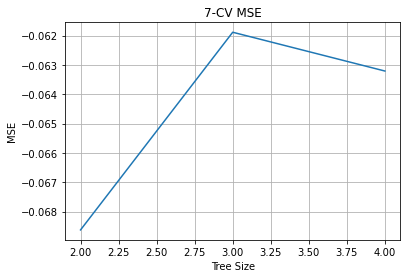

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
tree_sizes = range(2, 5)

MSE_scores = []

# 7-Fold CV for each tree size 
for size in tree_sizes:
    reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=size, random_state=123)
    MSE_s = -cross_val_score(reg_tree, x, y, cv=7)
    MSE_scores.append(np.mean(MSE_s))

# plot CV-MSE as tree size gets bigger 
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

graphviz를 설치하기

프로그램 설치후 path 환경 셋팅  
C:\Program Files\Graphviz 2.44.1\bin  
C:\Program Files\Graphviz 2.44.1\bin\dot.exe  

conda install python-graphviz   
conda install pydot   

https://pypi.org/project/graphviz/

https://graphviz.org/download/
https://www2.graphviz.org/Packages/stable/windows/10/cmake/Release/

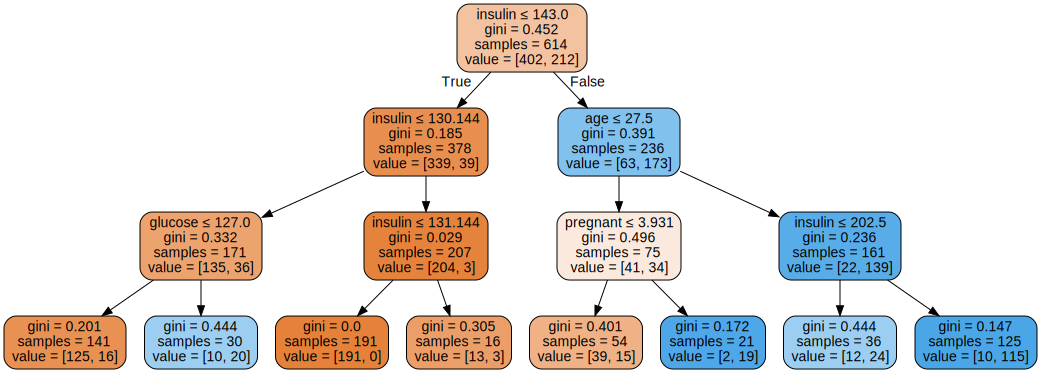

In [31]:
from sklearn.tree import export_graphviz
import graphviz

dot_data=export_graphviz(clf, out_file=None, feature_names=col_names[:-1]
                , special_characters=True, impurity=True, filled=True,rounded=True)
graph = graphviz.Source(dot_data)  
graph

## iris

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
import pandas as pd 
import numpy as np



In [32]:
from sklearn.datasets import load_iris
from sklearn import tree
import  numpy as np
import pandas as pd
from  sklearn.preprocessing import Normalizer

iris = load_iris()

#norm_iris=Normalizer().fit_transform(iris.data)

df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['species']=iris.target

target_names=iris.target_names
print(target_names)

['setosa' 'versicolor' 'virginica']


In [33]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
df.shape

(150, 5)

In [35]:
df.groupby('species').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


In [36]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [39]:
df['species']=df['species'].replace({0:'setosa',1:'versicolor',2:'virginica'})

In [40]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
df.groupby('species').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


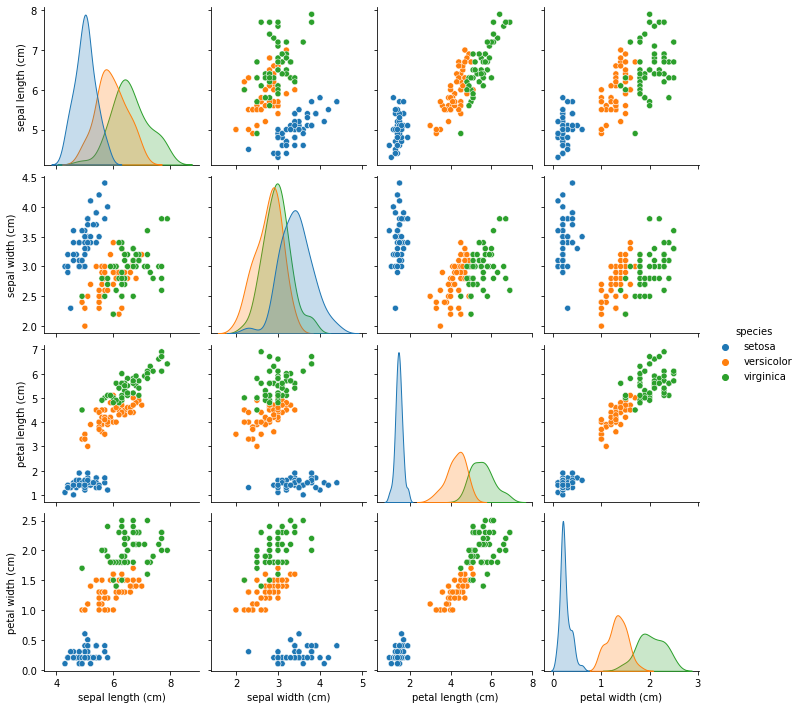

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df,hue='species')


In [43]:
y=df['species'].copy()
del df['species']



target자료가 숫자 0,1,2이므로 처리, 만약 문자로 되어 있을 경우는 

LabelEncoder() 처리를 해야 함

In [44]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

x_train, x_test, y_train, y_test=train_test_split(df, y,test_size=0.3, random_state =1000,shuffle=True )

clf = clf.fit(x_train, y_train)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(105, 4)
(45, 4)
(105,)
(45,)


[Text(167.4, 195.696, 'X[3] <= 0.8\nentropy = 1.58\nsamples = 105\nvalue = [39, 34, 32]'),
 Text(125.55000000000001, 152.208, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(209.25, 152.208, 'X[3] <= 1.75\nentropy = 0.999\nsamples = 66\nvalue = [0, 34, 32]'),
 Text(167.4, 108.72, 'X[2] <= 5.05\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(83.7, 65.232, 'X[0] <= 4.95\nentropy = 0.191\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(41.85, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(125.55000000000001, 21.744, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(251.10000000000002, 65.232, 'X[0] <= 6.05\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(209.25, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(292.95, 21.744, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(251.10000000000002, 108.72, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

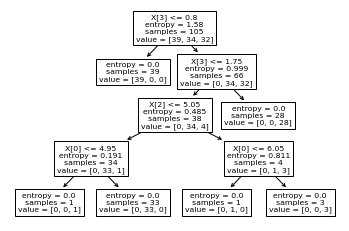

In [46]:
tree.plot_tree(clf) 

graphviz를 설치하기

프로그램 설치후 path 환경 셋팅  
C:\Program Files\Graphviz 2.44.1\bin  
C:\Program Files\Graphviz 2.44.1\bin\dot.exe  

conda install python-graphviz   
conda install pydot   

https://pypi.org/project/graphviz/

https://graphviz.org/download/
https://www2.graphviz.org/Packages/stable/windows/10/cmake/Release/

In [47]:
from sklearn.tree import export_graphviz
import graphviz

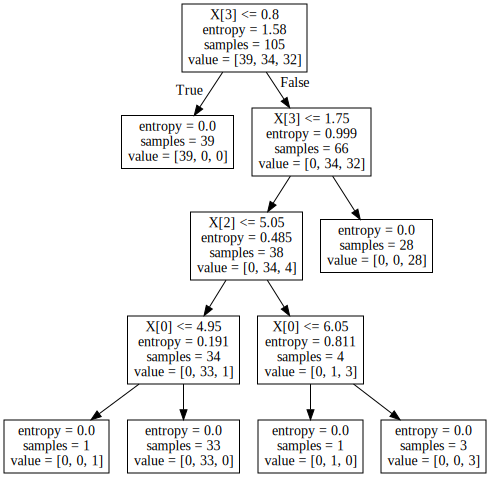

In [48]:
dot_data = export_graphviz(clf, out_file='tree.dot') 

with open('tree.dot') as f:
     dot_graph=f.read()
graphviz.Source(dot_graph)

In [49]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
proba=clf.predict_proba(x_test)



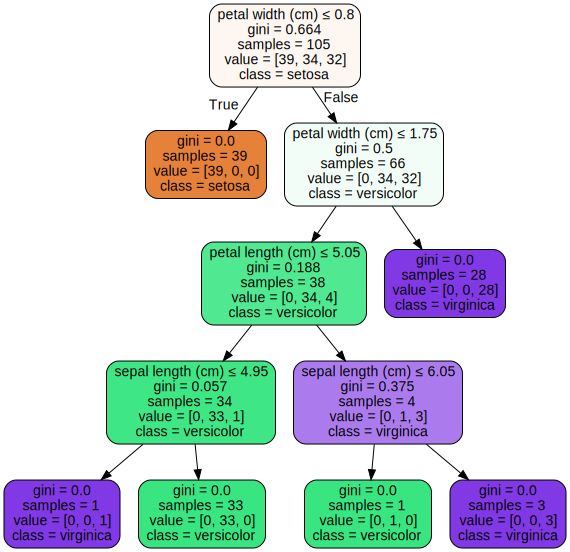

In [50]:
dot_data=export_graphviz(clf, out_file=None, class_names=iris.target_names, feature_names=iris.feature_names
                , special_characters=True, impurity=True, filled=True,rounded=True)
graph = graphviz.Source(dot_data)  
graph

In [51]:
print(y_test.shape)
print(pred.shape)

(45,)
(45,)


In [52]:
score_train=clf.score(x_test, y_test)
print(score_train)

0.9333333333333333


In [53]:
accuracy=[]
max_depth_range = list(range(1, 6))
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth,random_state = 0)
    clf.fit(x_train, y_train)
    clf.predict(x_test)
    score = clf.score(x_test, y_test)
    accuracy.append(score)
   

In [54]:
print(accuracy)

[0.6, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333]


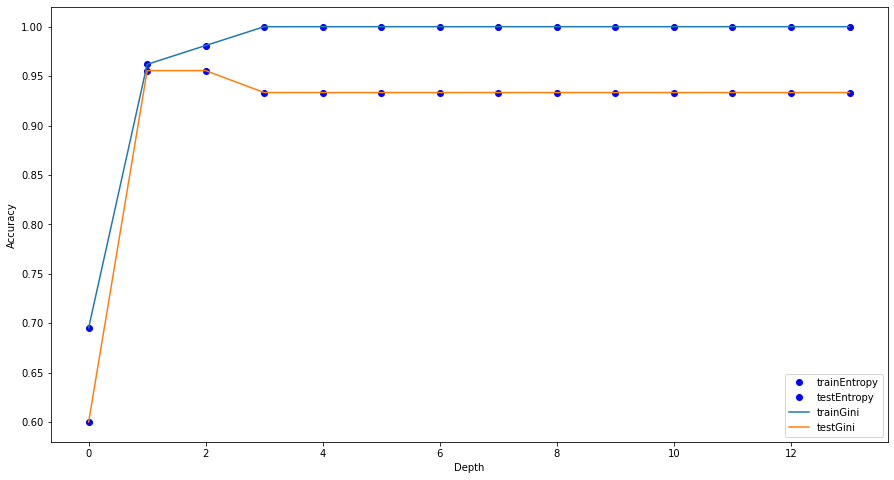

In [55]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from  sklearn.tree import DecisionTreeClassifier 

trainGini = []
testGini = []
trainEntropy = []
testEntropy = []

for k in tqdm(range(1, 15)):
    dt = DecisionTreeClassifier(max_depth=k)
    dt.fit(x_train, y_train)
    
    # 정확도 측정
    trainGini.append(dt.score(x_train, y_train))
    testGini.append(dt.score(x_test, y_test))
  
    dt = DecisionTreeClassifier( max_depth=k)
    dt.fit(x_train, y_train)
    
    # 정확도 측정
    trainEntropy.append(dt.score(x_train, y_train))
    testEntropy.append(dt.score(x_test, y_test))
    
plt.figure(figsize=(15, 8))
plt.plot(trainEntropy,'bo',label='trainEntropy')
plt.plot(testEntropy,'bo', label='testEntropy')
plt.plot(trainGini, label='trainGini')
plt.plot(testGini, label='testGini')

plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [56]:
from sklearn.metrics import classification_report 

clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
clf.fit(x_train, y_train)
pred = clf.predict(x_train)
print(classification_report(y_test, clf.predict(x_test))) 
print("test score : {}".format(clf.score(x_test, y_test)))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.94      0.94      0.94        16
   virginica       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

test score : 0.9555555555555556


In [57]:
clf = tree.DecisionTreeClassifier( random_state=0)  # max_depth=2일때 
clf.fit(x_train, y_train)
clf.predict(x_test)
proba=clf.predict_proba(x_test)

트리 특성 중요도  :  트리를 만드는 결정   
각 특성이 얼마나 중요한지를 평가

In [58]:
from sklearn.tree import export_text
tree_rules = export_text(clf,feature_names = list(df.columns))

print(tree_rules)

|--- petal width (cm) <= 0.80
|   |--- class: setosa
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.05
|   |   |   |--- sepal length (cm) <= 4.95
|   |   |   |   |--- class: virginica
|   |   |   |--- sepal length (cm) >  4.95
|   |   |   |   |--- class: versicolor
|   |   |--- petal length (cm) >  5.05
|   |   |   |--- sepal length (cm) <= 6.05
|   |   |   |   |--- class: versicolor
|   |   |   |--- sepal length (cm) >  6.05
|   |   |   |   |--- class: virginica
|   |--- petal width (cm) >  1.75
|   |   |--- class: virginica

